# Regression discontinuity with `pymc` models

In [7]:
import causalpy as cp

In [8]:
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'svg'
seed = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = cp.load_data("rd")

<div class="alert alert-info">

Note:

The `random_seed` keyword argument for the PyMC sampler is not neccessary. We use it here so that the results are reproducible.

</div>

In [10]:
result = cp.pymc_experiments.RegressionDiscontinuity(
    df,
    formula="y ~ 1 + bs(x, df=6) + treated",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
    treatment_threshold=0.5,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


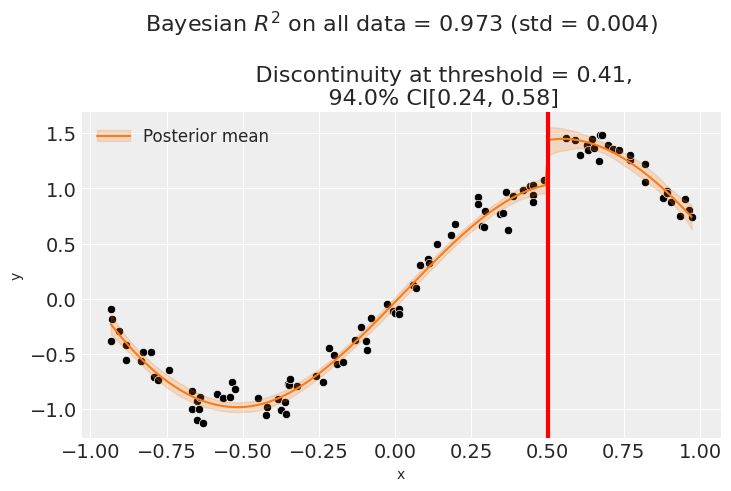

In [11]:
fig, ax = result.plot()

In [12]:
result.summary()

============================Regression Discontinuity============================
Formula: y ~ 1 + bs(x, df=6) + treated
Running variable: x
Threshold on running variable: 0.5

Results:
Discontinuity at threshold = 0.41
Model coefficients:
Intercept                     -0.23, 94% HDI [-0.32, -0.14]
treated[T.True]               0.41, 94% HDI [0.23, 0.58]
bs(x, df=6)[0]                -0.60, 94% HDI [-0.79, -0.40]
bs(x, df=6)[1]                -1.07, 94% HDI [-1.21, -0.93]
bs(x, df=6)[2]                0.28, 94% HDI [0.13, 0.43]
bs(x, df=6)[3]                1.65, 94% HDI [1.48, 1.81]
bs(x, df=6)[4]                1.03, 94% HDI [0.67, 1.36]
bs(x, df=6)[5]                0.57, 94% HDI [0.37, 0.76]
sigma                         0.10, 94% HDI [0.09, 0.12]
